# Recommender Systems
- Content Based
    - Focuses on the attributes of the items and gives you recommendations based on the similarities between them.
- Collaborative Filtering (CF)
    - Produces recommendations based on the knowledge of the user's attitude to items, that it uses the "wisdom of the crowd" to recommend systems.
    - Similar to amazon, where they would recommend items they believe you will enjoy based off other people's shopping experiences.
    - More commonly used on content based systems.
    - Has the ability to fo feature learning on its own (it will learn by itself what features to use)

Filter based off user preference or similarity between the items.

# Simple Recommender System using correlation and Corrwith

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Name of columns werre provided for dataset
column_names = ['user_id','item_id', 'rating', 'timestamp']

In [3]:
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
# Combine both data csv and movie titles csv
df = pd.merge(df, movie_titles, on='item_id', how='left')

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [9]:
# Top five highest rating titles
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [10]:
# Top five titles with the most ratings
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
# Create a df of titles with their average rating
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
# Add a column to get total number of ratings for each title
ratings['count'] = df.groupby('title')['rating'].count()

In [14]:
ratings.head()

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:title={'center':'Histogram of Counts'}, xlabel='count', ylabel='Count'>

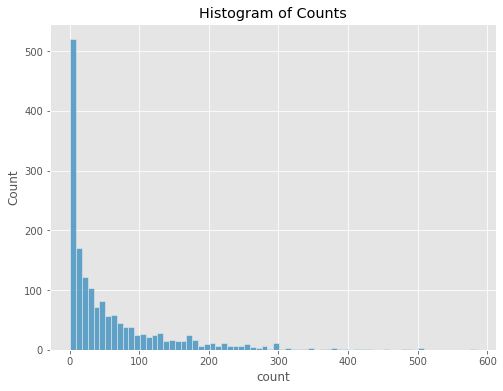

In [15]:
# Lets see a histogram of number ratings to show the spread of number of ratings
plt.figure(figsize=(8,6))
plt.title('Histogram of Counts')
sns.histplot(data=ratings, x='count', bins=70)

<AxesSubplot:title={'center':'Histogram of Ratings'}, xlabel='rating', ylabel='Count'>

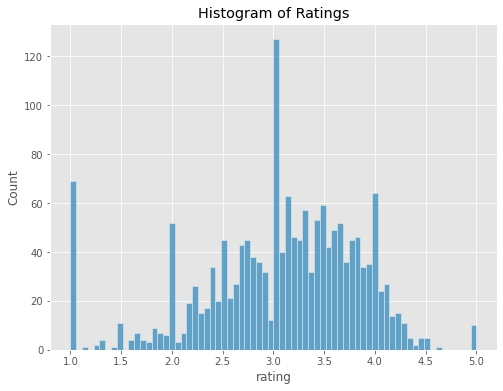

In [16]:
# Show a histogram to see the spread of ratings and their score.
plt.figure(figsize=(8,6))
plt.title('Histogram of Ratings')
sns.histplot(data=ratings, x='rating', bins=70)

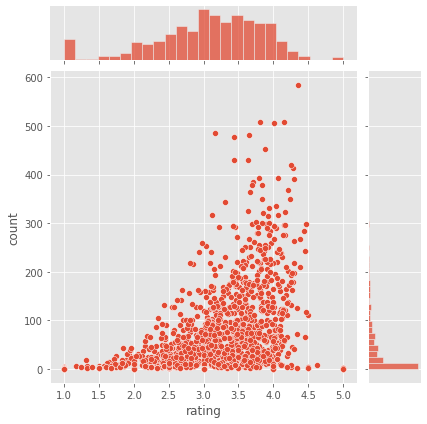

In [17]:
# Compare rating and count, there seems to be a higher rating as there as more ratings, this makes sense if the movie is popular.
sns.jointplot(x='rating', y='count', data=ratings)

In [18]:
# Creating a matrix using a pivot table
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [19]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Showing movies with the most ratings (Popular movies)
ratings.sort_values('count', ascending=False).head(10)

,rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [21]:
# Going to choose two movies in 
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [22]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [23]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

Using Corrwith to get a correlation from two data frames.
- In this case, from the movie matrix, using all movie ratings for each user, how well does it correlate with the ratings with the users who rated Star wars

In [24]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

c:\Users\on3mo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\on3mo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [25]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

c:\Users\on3mo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\on3mo\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
# Create DF for cleaner view
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [27]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [28]:
# Here you can see the reason why star wars is correlated with the other movies at 100% is probably because one or few people all reviewed the same movies.
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [29]:
# Lets combine star wars correlation and number of ratings
corr_starwars = pd.merge(corr_starwars, ratings['count'], on='title')

In [30]:
# Now we can use the number of ratings and for a filter
corr_starwars.head()

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


<AxesSubplot:title={'center':'Histogram of Counts'}, xlabel='count', ylabel='Count'>

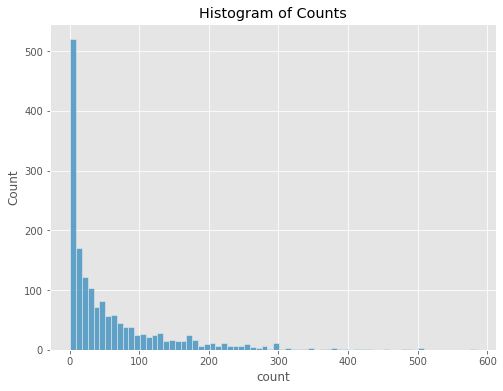

In [31]:
# We plot this again to show that around 100 ratings it levels off
plt.figure(figsize=(8,6))
plt.title('Histogram of Counts')
sns.histplot(data=ratings, x='count', bins=70)

In [32]:
# Therefore we choose anything above or equal to 100, we can play around with this number to change results
corr_starwars[corr_starwars['count'] >= 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Now you can see this makes more sense, these movies above are more similar to star wars

In [33]:
# Get similar recommendations to Liar Liar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])

In [34]:
corr_liarliar.dropna(inplace=True)

In [35]:
corr_liarliar.head()

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [36]:
corr_liarliar = corr_liarliar.join(ratings['count'])

In [37]:
corr_liarliar.head()

,Correlation,count
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [38]:
# Here you can see all the movies that have a high correlation with Liar Liar.
corr_liarliar[corr_liarliar['count'] >= 100].sort_values('Correlation', ascending=False).head(10)

,Correlation,count
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


# This was a simple recomendation system